In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy.random as rand
import stochastic.processes.noise as sto

from scipy import interpolate

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
def mean(x):
    return sum(x)/len(x)
# Function that gives the average value of an array

### Calculating the values of the stochastic function R(t)

Text(0.5, 1.0, 'The Delta-Correlated Stationary Gaussian Process R(t)')

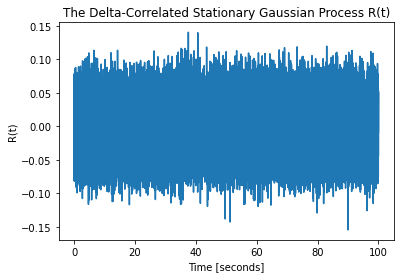

In [4]:
import stochastic.processes.noise as sto

G = sto.GaussianNoise(1)
times = np.arange(0,100 ,100/100002)
# Creates an array of the 100,000 steps with timestep 0.001

R_t = G.sample_at(times)
# Generates the corresponding value of the stochastic function of each time

plt.plot(times[1:], R_t)
# Plots the Noise Function

plt.xlabel("Time [seconds]")
plt.ylabel("R(t)")
plt.title("The Delta-Correlated Stationary Gaussian Process R(t)")

# reference - pyhton stochastic package 
# [28] C. Flynn (2018) Noise processes, Noise Processes - stochastic 0.7.0 documentation. 
# MIT. Available at: 
# https://stochastic.readthedocs.io/en/stable/noise.html#stochastic.processes.noise.GaussianNoise (Accessed: November 5, 2022). 

Text(0.5, 1.0, 'Stochastic Noise Histogram')

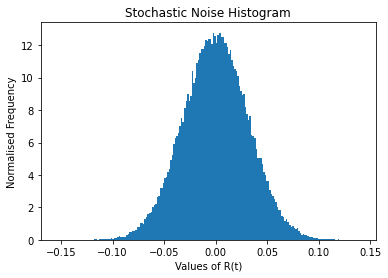

In [5]:
amplitudes_Rt, amplitudesbins_Rt, npatches_Rt = plt.hist(R_t, bins=200, density=True)
# Plots the normalised histogram of the stochastic function R(t) with 200 bins 

plt.xlabel("Values of R(t)")
plt.ylabel("Normalised Frequency")
plt.title("Stochastic Noise Histogram")

A Gaussian Curve can be fitted to this histogram in order to show the Gaussian distribution. This also will give us an accurate value of the mean of the stochastic function R(t).

In [6]:
range_avg_Rt = np.linspace(min(R_t), max(R_t), 200)
# Gives the average value of R(t) within each bin to help us fit a Gaussian Function to the data

In [7]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
# Defines the gaussian function with paramerters a, x0 and sigma

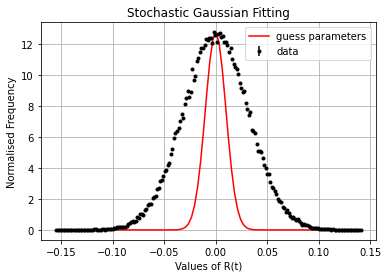

In [8]:
# plot the raw data
plt.errorbar(range_avg_Rt, amplitudes_Rt, yerr=0, fmt=".", color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('Values of R(t)')
plt.ylabel('Normalised Frequency')


# initial guess
pars0 = (max(amplitudes_Rt), 0,0.01)

# overlay gaussian
x = np.linspace(min(range_avg_Rt), max(range_avg_Rt), 100)

plt.plot(x, gaus(x,*pars0), color = 'red', label = 'guess parameters')
plt.legend();
plt.title("Stochastic Gaussian Fitting");

The covariance matrix is: 
 [[ 3.95633619e-02 -8.47415511e-11 -6.62751070e-05]
 [-8.47415511e-11  3.33065194e-07  1.41511701e-13]
 [-6.62751070e-05  1.41511701e-13  3.33064934e-07]] 

 a vlaue (best-fit) = 13 ± 0.2
 x0 value (best-fit) = 4.6e-05 ± 7.7e-05
 sigma value (best-fit) = 0.032 ± 0.00058


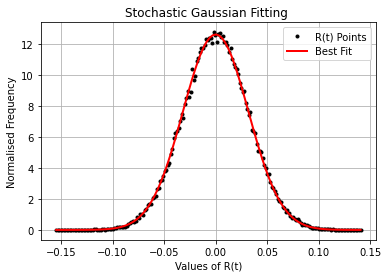

In [9]:
# perform fitting
popt, pcov = curve_fit(gaus, range_avg_Rt, amplitudes_Rt,  absolute_sigma=True, p0=pars0)

print("The covariance matrix is: \n", pcov, "\n")

# extract best-fit parameter and its error
a_opt = popt[0]
x0_opt = popt[1]
sigma_opt = popt[2]
a_opt_err = np.sqrt(pcov[0, 0])
x0_opt_err = np.sqrt(pcov[1, 1])
sigma_opt_err = np.sqrt(pcov[2, 2])

print(f" a vlaue (best-fit) = {a_opt:.2g} ± {a_opt_err:.2g}")
print(f" x0 value (best-fit) = {x0_opt:.2g} ± {x0_opt_err:.2g}")
print(f" sigma value (best-fit) = {sigma_opt:.2g} ± {sigma_opt_err:.2g}")

# plot data
plt.plot(range_avg_Rt, amplitudes_Rt, 'ko', markersize=3, label = 'R(t) Points')

# creating x interval to include in y fit
x = np.linspace(min(range_avg_Rt), max(range_avg_Rt), 100)
y_fit = gaus(x, *popt)
plt.plot(x, y_fit, color="red", label="Best Fit", linewidth=2)


plt.grid(True)
plt.xlabel("Values of R(t)")
plt.ylabel("Normalised Frequency")
plt.title("Stochastic Gaussian Fitting ")
plt.legend();

### Velocity Verlet Algorithm 

In [10]:
γ = 1.8 
# Optimal value for damping coefficient 
# Reference: [27]

In [11]:
def verlet_algorithm(x, dt):
    v = 0
    # Initial velocity of particle is 0 
    
    t = 0
    # Time starts at 0
    
    i = 0
    # Indexing starts at 0
    
    xlist =[]
    vlist = []
    tlist = []
    # Empty lists the positions, velocities and times will be entered into respectively 

    xlist.append(x)
    vlist.append(v)
    tlist.append(t)
    # Appends initial values of position(x), velocity(v) and time(t) into their respective lists 
    
    for i in range (0, 100000):
        # When i is between 0 and 100,000
        
        x_new = x + v * dt + (dt**2) * 0.5 * ( 48/x**13 - 24/x**7 - γ*v + np.sqrt(2*γ)*R_t[i] )
        # Defines the new position values using equation 10
        
        v_new = (v + 0.5*dt*( 48/(x**13) - 24/(x**7) - γ*v + np.sqrt(2*γ)*(R_t[i] + R_t[i+1]) + 48/(x_new)**13 -24/(x_new)**7) ) / (1 + 0.5*dt*γ)
        # Defines the new velocity value explicitly by rearranging equation 11 
        
        x = x_new
        v = v_new
        # Redefines x as the new position and v as the new velocity 
        
        t = t + dt
        # Adds the timestep to the time value
        
        xlist.append(x)
        vlist.append(v)
        tlist.append(t)
        # Adds new position, velocity and times into their respective lists
        # Then code iterates to new next index
        
        
    return xlist, vlist, tlist
    # Returns the position, velocity and time lists

### Validation of the Velocity Verlet Algorithm (Section 3.4)

To validate the velocity Verlet algorithm a simple example is considered - the one-dimensional classical harmonic oscillator. This system has an equation of motion of $-\frac{dV(x)}{dx}=m\frac{d^2x}{dt^2}\ \ \$

This has exact analytical solutions of 
$x(t)=Acos(wt+\Phi)$ and $v(t)=-wAsin(wt+\Phi)$

The Velocity Verlet algorithm will be used to solve this equation of motion. The solution found from the velocity Verlet algorithm should match the exact analytical solutions found above.


In [12]:
def x(t):
    return A*np.cos(w*t+ϕ)
# Solution of Position

def v(t):
    return -A*w*np.sin(w*t+ϕ)
# Solution of Velocity

The following constant values are assumed as this is an example to help validate the velocity verlet algorithm. 

In [13]:
k = 1
E = 1

A = np.sqrt(2*E/k)
w = np.sqrt(1/1)

ϕ = 0

In [14]:
t = np.linspace(0,10,50)

Text(0.5, 1.0, 'Exact Analytical Solution of Position for 1D Harmonic Oscillator')

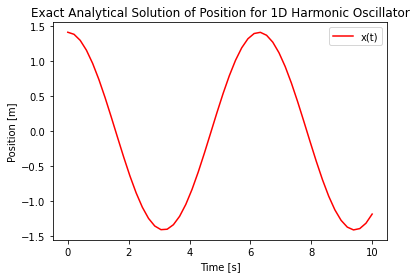

In [15]:
plt.plot(t, x(t), color = "red")

plt.legend(["x(t)"])

plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.title("Exact Analytical Solution of Position for 1D Harmonic Oscillator")

Text(0.5, 1.0, 'Exact Analytical Solution of Velocity for 1D Harmonic Oscillator')

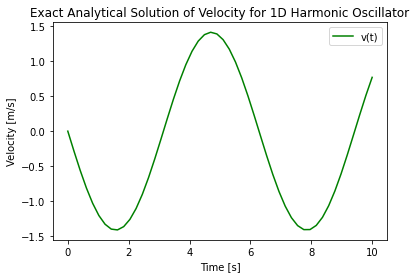

In [16]:
plt.plot(t, v(t), color = "green")
plt.legend(["v(t)"])

plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.title("Exact Analytical Solution of Velocity for 1D Harmonic Oscillator")

From equation 13 we see that the force of this system is $F=-\frac{dV(x)}{dx}$

Hence, we can take the mass of the particles to be 1 meaning that we can use Newton's second law to find an expression for acceleration of the particle which we define as: $a=-\frac{dV(x)}{dx}$

Using equation 12 as the potential energy we define the acceleration by $a=-kx$

In [17]:
def acceleration(x):
    return -k*(x)
# Function of accleration using the derivative of the potential shown in equation 12

In [18]:
initial_position = A
initial_velocity = 0
# Assume particle starts at rest

In [19]:
def verlet_algorithm(x, dt):
    v = 0
    # Initial velocity of particle is 0 
    
    t = 0
    # Time starts at 0
    
    i = 0
    # Indexing starts at 0
    
    xlist =[]
    vlist = []
    tlist = []
    # Empty lists the positions, velocities and times will be entered into respectively 

    xlist.append(x)
    vlist.append(v)
    tlist.append(t)
    # Appends initial values of position(x), velocity(v) and time(t) into their respective lists 
    
    for i in range (0, 50):
        # When i is between 0 and 50
        
        x_new = x + v * dt + (dt**2) * 0.5 * acceleration(x)
        # Defines the new position values using equation 16
        
        v_new = v + 0.5*dt*(acceleration(x_new) + acceleration(x))
        # Defines the new velocity value explicitly by rearranging equation 16 
        
        x = x_new
        v = v_new
        # Redefines x as the new position and v as the new velocity 
        
        t = t + dt
        # Adds the timestep to the time value
        
        xlist.append(x)
        vlist.append(v)
        tlist.append(t)
        # Adds new position, velocity and times into their respective lists
        # Then code iterates to new next index
        
        
    return xlist, vlist, tlist
    # Returns the position, velocity and time lists

In [20]:
dt = 0.2
# Time step is 0.2 as we study 50 steps between 0 and 10 seconds 

In [21]:
positions_SHM = verlet_algorithm(initial_position, dt)[0]
velocities_SHM = verlet_algorithm(initial_position, dt)[1]
times_SHM = verlet_algorithm(initial_position, dt)[2]

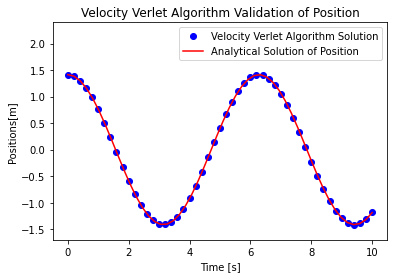

In [22]:
plt.plot(times_SHM, positions_SHM, 'bo', markersize =6)

plt.plot(t, x(t), color = "red")
plt.ylim(-1.7,2.4)

plt.ylabel("Positions[m]")
plt.xlabel("Time [s]")
plt.title("Velocity Verlet Algorithm Validation of Position")

plt.legend(["Velocity Verlet Algorithm Solution","Analytical Solution of Position"], loc="upper right")

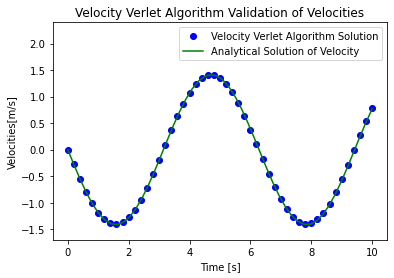

In [23]:
plt.plot(times_SHM, velocities_SHM, 'bo', markersize =6)

plt.plot(t, v(t), color = "green")
plt.ylim(-1.7,2.4)

plt.ylabel("Velocities[m/s]")
plt.xlabel("Time [s]")
plt.title("Velocity Verlet Algorithm Validation of Velocities")

plt.legend(["Velocity Verlet Algorithm Solution","Analytical Solution of Velocity"], loc="upper right")

## (a) Particle's Motion

In [24]:
def verlet_algorithm(x, dt, steps):
    v = 0
    # Initial velocity of particle is 0 
    
    t = 0
    # Time starts at 0
    
    i = 0
    # Indexing starts at 0
    
    xlist =[]
    vlist = []
    tlist = []
    # Empty lists the positions, velocities and times will be entered into respectively 

    xlist.append(x)
    vlist.append(v)
    tlist.append(t)
    # Appends initial values of position(x), velocity(v) and time(t) into their respective lists 
    
    for i in range (0, steps):
        # When i is between 0 and 100,000
        
        x_new = x + v * dt + (dt**2) * 0.5 * ( 48/x**13 - 24/x**7 - γ*v + np.sqrt(2*γ)*R_t[i] )
        # Defines the new position values using equation 10
        
        v_new = (v + 0.5*dt*( 48/(x**13) - 24/(x**7) - γ*v + np.sqrt(2*γ)*(R_t[i] + R_t[i+1]) + 48/(x_new)**13 -24/(x_new)**7) ) 
                / (1 + 0.5*dt*γ)
        # Defines the new velocity value explicitly by rearranging equation 11 
        
        x = x_new
        v = v_new
        # Redefines x as the new position and v as the new velocity 
        
        t = t + dt
        # Adds the timestep to the time value
        
        xlist.append(x)
        vlist.append(v)
        tlist.append(t)
        # Adds new position, velocity and times into their respective lists
        # Then code iterates to new next index
        
        
    return xlist, vlist, tlist
    # Returns the position, velocity and time lists

In [25]:
positions = verlet_algorithm(3, 0.001, 100000)[0]
# Gives the positions of the particles array when the particle starts at x=3 with timestep 0.001

velocities = verlet_algorithm(3, 0.001, 100000)[1]
# Gives the Velocities of the particles array when the particle starts at x=3 with timestep 0.001

time = verlet_algorithm(3, 0.001, 100000)[2]
# Gives the Times of the particles array when the particle starts at x=3 with timestep 0.001

Text(0.5, 1.0, 'Particle Motion from x(0)=3 and timestep 0.001')

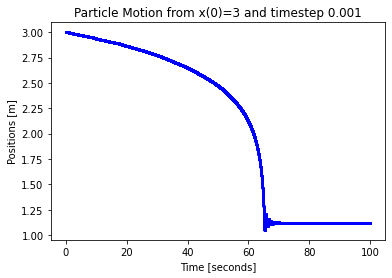

In [26]:
plt.plot(time ,positions,'bo', markersize='1')
plt.xlabel("Time [seconds]")
plt.ylabel("Positions [m]")
# plt.grid(True)

plt.title("Particle Motion from x(0)=3 and timestep 0.001")

#### Where does this diverge

To study this behaviour more in depth we look at the behaviour of the particle as it diverges 

Limiting the x-axis to being between 60 and 100 gives us an inidcation of the periodic behaviour as the partcile's position gets closer and closer to the r value of the equilbirium point of the Lennard-Jones potential which is $r_0=2^\frac{1}{6}=1.122462048$. 

(1.0, 1.25)

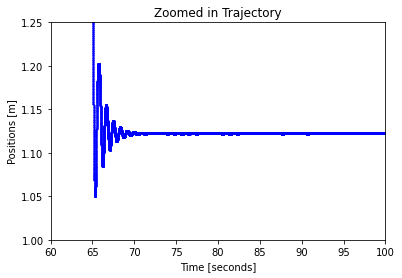

In [27]:
plt.plot(time ,positions,'bo', markersize='1')
plt.xlabel("Time [seconds]")
plt.ylabel("Positions [m]")
# plt.grid(True)

plt.title("Zoomed in Trajectory")

plt.xlim(60,100)
plt.ylim(1,1.25)

It is evident that the breif periodic behaviour of the partcile stops at around 70 seconds. Hence, an average value of the position can be taken after this time to give an inidication of the position the partcile finishes at. 

In [28]:
positions_after_70s = positions[70000:]
mean(positions_after_70s)
# Gives the mean value of the positions after 70 seconds

1.1224596599034407

In [29]:
print(f"The mean value of the position after 70 seconds is {mean(positions_after_70s):.6g}")
print("\nThe equilibrium position of the Lennard-Jones potential is 1.122462048")
print("\nHence, the mean value of the position after 70 seconds matches the equilibirum position to 5 significant figures")

The mean value of the position after 70 seconds is 1.12246

The equilibrium position of the Lennard-Jones potential is 1.122462048

Hence, the mean value of the position after 70 seconds matches the equilibirum position to 5 significant figures


In [30]:
#calculate standard error of the mean 
np.std(positions_after_70s, ddof=1) / np.sqrt(np.size(positions_after_70s))

1.0821050343572205e-06

Text(0.5, 1.0, 'Velocity of Particle')

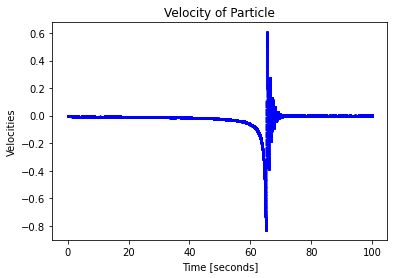

In [31]:
plt.plot(time , velocities,'bo', markersize='1')
plt.xlabel("Time [seconds]")
plt.ylabel("Velocities")
plt.title("Velocity of Particle")

Text(0.5, 1.0, 'Position Velocity in Damped System')

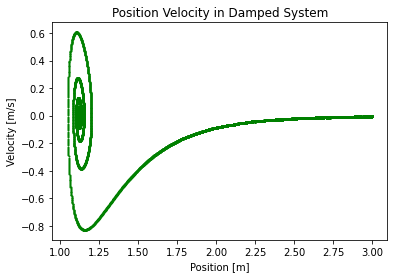

In [32]:
plt.plot(positions, velocities, 'go', markersize = 1)

plt.xlabel("Position [m]")
plt.ylabel("Velocity [m/s]")
plt.title("Position Velocity in Damped System")

In [33]:
positions_10th_step = positions[0::10]
# List of the positions at every 10th Step 

In [34]:
print("Positions at every 10th step is")
positions_10th_step

Positions at every 10th step is


[3,
 3.0000010858381616,
 3.0000042545984464,
 3.000009086208006,
 3.0000147171890053,
 3.0000178514739417,
 3.0000207730684805,
 3.000023350135384,
 3.0000219430805655,
 3.0000197696548505,
 3.0000142763317745,
 3.0000057896580903,
 2.9999941510421535,
 2.9999834897053437,
 2.9999732584406194,
 2.999961614669764,
 2.9999500747650694,
 2.9999372352020397,
 2.9999257621684445,
 2.99991386611161,
 2.9998997289147264,
 2.9998842476880494,
 2.9998667719623344,
 2.9998492775039147,
 2.999829541905982,
 2.9998084544655454,
 2.999785554445267,
 2.9997611237977817,
 2.999737371149929,
 2.9997135770806116,
 2.999688315029661,
 2.999664090276072,
 2.9996401306334666,
 2.9996150228300467,
 2.9995875172256166,
 2.999559728505066,
 2.999534897652164,
 2.9995110075655576,
 2.999485935306335,
 2.9994583182970556,
 2.999429906525849,
 2.99940170274147,
 2.9993726890828984,
 2.999341342647486,
 2.9993107860872485,
 2.9992812422115196,
 2.9992499571918936,
 2.999218005755466,
 2.999189597923438,
 2.9991

In [35]:
velocities_10th_step = velocities[0::10]
# List of Velocities at every 10th Step

In [36]:
print("Velocities at every 10th step is")
velocities_10th_step

Velocities at every 10th step is


[0,
 0.00019665788136078173,
 0.00036534546135705607,
 0.0006359690461034481,
 0.00039728480874198996,
 0.0002776078617644757,
 0.00031593067687938665,
 -4.435056562696643e-05,
 -0.00019753714836798583,
 -0.0003152355314548799,
 -0.0007376453804260909,
 -0.0009655923643147697,
 -0.0011334304394625691,
 -0.000985555035224285,
 -0.0010786244921010405,
 -0.0011480841480937534,
 -0.0013238540377427277,
 -0.0011741796942426757,
 -0.0012311202589323663,
 -0.001278193666309557,
 -0.001534909106046137,
 -0.00165711865308526,
 -0.001703968345131967,
 -0.0019085097618947995,
 -0.002008747334417195,
 -0.0020904357003443943,
 -0.0024280707997705125,
 -0.002273978566573648,
 -0.0024745527787684444,
 -0.0023412915875297433,
 -0.002611229223325044,
 -0.0023895691633278888,
 -0.002370135360468514,
 -0.002620557819070145,
 -0.0028595842016070267,
 -0.0026702867138771384,
 -0.0023473166432706237,
 -0.0025445015058378428,
 -0.0025787568367960775,
 -0.0027972073395367957,
 -0.0027903777882998695,
 -0.0028

## (b) Position and Velocity Histograms

#### Position Histogram

Text(0, 0.5, 'Normalised frequency')

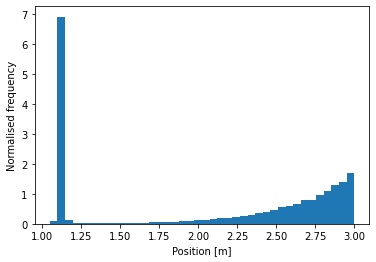

In [37]:
amplitudes_x, amplitudesbins_x, npatches_x = plt.hist(positions, bins=40, density = True)

plt.title("Position Histogram")
plt.xlabel("Position [m]")
plt.ylabel("Normalised frequency")

To try to make the histogram distribution smoother the number of velocity Verlet algorithm steps is increased and the number of bins is increased.

In [38]:
G = sto.GaussianNoise(1)
times = np.arange(0,100 ,100/200002)
# Creates an array of the 100,000 steps with timestep 0.001

R_t = G.sample_at(times)

In [39]:
positionsch = verlet_algorithm(3, 0.001, 200000)[0]

Text(0, 0.5, 'Normalised frequency')

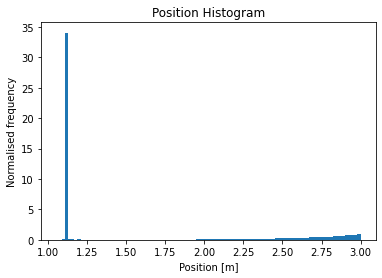

In [40]:
amplitudes_x, amplitudesbins_x, npatches_x = plt.hist(positionsch, bins=100, density = True)

plt.title("Position Histogram")
plt.xlabel("Position [m]")
plt.ylabel("Normalised frequency")

We can see that increasing these paramters will just cause the value between 1.10 and 1.15 to blow up and hence, the other values would be impossible to see. Hence, the orginal graph is taken as the the distribution histogram for the positions.

#### Velocity HIstogram 

In [41]:
v=0

In [42]:
def acceleration(x, i):
    return 48/(x**13) - 24/(x**7) - γ * v + np.sqrt(2*γ) * R_t[i]
# sample[i] chooses what noise value to apply to the acceleration term based on where it is in the iterations

In [43]:
def get_velocity_list(x, dt, steps):
    i = 0
    # Indexing starts at 0
    v = 0
    # Assume the particle starts at rest 
    xlist = []
    vlist = []
    # Empty lists that the positions and velocities will be put into respectively
    
    for i in range(0,steps):
        x_new = x + v * dt + 0.5 * acceleration(x, i) * dt**2
        
        # v_new = (v+ 0.5*dt*(acceleration(x, i) + 48/x_new**13 - 24/x_new**7 + np.sqrt(2*γ) * sample[i+1]) )/(1+1.8*dt/2)
        v_new = v + 0.5 * dt * (acceleration(x_new, i+1) + acceleration(x, i))
        # velocity verlet algorithm implementation using indexing on accelerations for specific noise values
        
        xlist.append(x)
        vlist.append(v)
        # adds each value to a  list
        
        x = x_new
        v = v_new
        # reassigns each index 
        
        i += 1
    return xlist, vlist

In [44]:
velocties = get_velocity_list(3, 0.001, 100000)[1]

Text(0, 0.5, 'Normalised frequency')

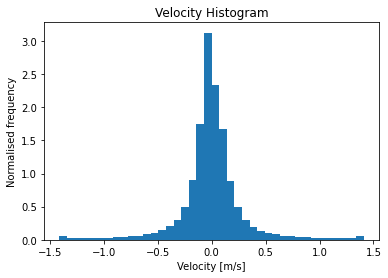

In [45]:
amplitudes_v, amplitudesbins_v, npatches_v = plt.hist(velocties, bins=40, density = True)

plt.title("Velocity Histogram")
plt.xlabel("Velocity [m/s]")
plt.ylabel("Normalised frequency")

To try to make the histogram distribution smoother the number of velocity Verlet algorithm steps is increased and the number of bins is increased.

In [46]:
G = sto.GaussianNoise(1)
times = np.arange(0,100 ,100/1000002)
# Creates an array of the 1,000,000 steps with timestep 0.001

R_t = G.sample_at(times)
# Generates the corresponding value of the stochastic function of each time

In [47]:
velocities_increased_steps = np.array(get_velocity_list(3,0.001, 1000000))[1]
# Gives an array of all the velocities 

Text(0, 0.5, 'Normalised frequency')

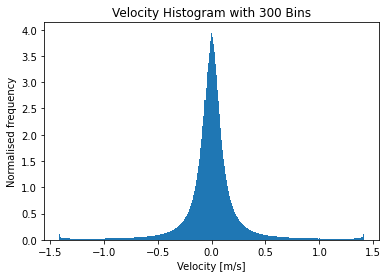

In [48]:
amplitudes_v, amplitudesbins_v, npatches_v = plt.hist(velocities_increased_steps, bins=300, density = True)

plt.title("Velocity Histogram with 300 Bins")
plt.xlabel("Velocity [m/s]")
plt.ylabel("Normalised frequency")

## (c) Average Velocity and Temperature

### Average Velocity

In order to find the correct average velocity based off the velocity distribution histogram we fit both a Gaussian curve and a Lorentzian curve in order to see which fits better with the data. Then the when the suitable distribution is fitted the average value will be calculated more accurately than a simple mean of the velocities.

Gaussian Function $G(x)=ae^{–\frac{(x–x_0)^2}{2σ^2}}$                                    [49]

Lorentizan Function $L(x)=\frac{1}{\pi}\frac{a}{({(x-x_0)}^2+a^2)}$                    [52]

where a is the amplitude of the distribution, $x_0$ is the mean value and σ is the standard deviation

#### Gaussian Fitting

In [49]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

Text(0.5, 1.0, 'Velocity Distribution With Gaussian Fitted')

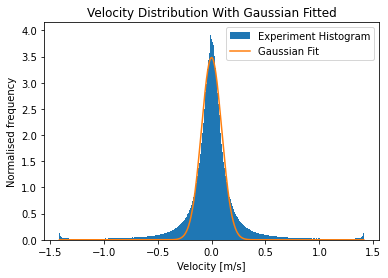

In [50]:
bin_heights, bin_borders, _ = plt.hist(velocities_increased_steps, bins='auto', label='Experiment Histogram', density =True)

bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# Calculates the centre of the bins using the paramters found from the histograms

popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
# Fits the data

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Gaussian Fit')
plt.legend()

plt.xlabel("Velocity [m/s]")
plt.ylabel("Normalised frequency")
plt.title("Velocity Distribution With Gaussian Fitted")

# Reference - [54] A. Mangs (2022) Fit a curve to a histogram in Python, DevPress. 
# Available at: https://devpress.csdn.net/python/630463e97e6682346619af03.html (Accessed: November 11, 2022). 

Clearly the amlitude of the histogram is higher than the fitted gaussian function. This leads us to believe that a Lorenztian fitting would be much more suitable for this set of data.

#### Lorentzian Fitting

In [51]:
range_avg_v = np.linspace(min(velocities_increased_steps), max(velocities_increased_steps), 300)
# Gives the average value of the velocity within each bin to help us fit a Lorentzian Function to the data

In [52]:
# Lorentzian parameter fitting
def lorentzian(x, a, x0):
    return (1/ np.pi) * a / ((x-x0)**2 + a**2)

pguess = [1 / (np.pi * max(amplitudes_v)), sum(range_avg_v * amplitudes_v) / 
          sum(amplitudes_v)]

# Fit the data
popt, pcov = curve_fit(lorentzian, range_avg_v, amplitudes_v, p0 = pguess)

# Results
bandwidth, avg_value = popt[0], popt[1]
# Gives the velocity at maximum amplitude and also gives the full 
# bandwidth at half maximum amplitude 

# Reference - [55] B. Prudholm (2014) Fit points to a Lorentzian curve and find center and half 
# maximum bandwidth in Python. [online] Stack Overflow. 
# Available at: <https://stackoverflow.com/questions/24437070/fit-points-to-a-lorentzian-
# curve-and-find-center-and-half-maximum-bandwidth-in-p> [Accessed 3 October 2022].

In [53]:
pcov
# Covariance Matrix

array([[1.18999983e-07, 3.95646239e-15],
       [3.95646239e-15, 1.18980840e-07]])

In [54]:
print(f"The Uncertainty on the Average Velocity of the particle is = {np.sqrt(pcov[1,1]):.2g} m/s to 2 significant figures")

The Uncertainty on the Average Velocity of the particle is = 0.00034 m/s to 2 significant figures


In [55]:
bandwidth

0.08195052701936639

In [56]:
avg_value

-0.0003729317319291526

In [57]:
y = ((max(amplitudes_v)-min(amplitudes_v) ) 
           / ( 1+ ((range_avg_v - avg_value)/(bandwidth))**2) + min(amplitudes_v) )
# Lorentzian function with correct paramters found using the parameter fitting above

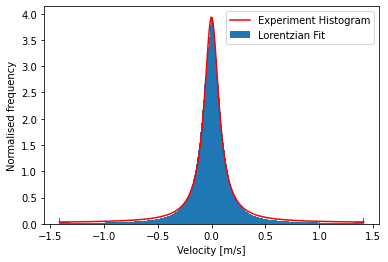

In [58]:
#plt.plot(range_avg_v, amplitudes_v, 'o', color = 'black', markersize =5)
plt.plot(range_avg_v , y, color = 'red')

amplitudes_v, amplitudesbins_v, npatches_v = plt.hist(velocities_increased_steps, bins=300, density = True)

plt.xlabel("Velocity [m/s]")
plt.ylabel("Normalised frequency")

plt.legend(['Experiment Histogram', 'Lorentzian Fit'])

In [59]:
print(f"The Average Velocity of the particle is = {avg_value:.3g} m/s to 2 significant figures")

The Average Velocity of the particle is = -0.000373 m/s to 2 significant figures


In [60]:
velocities_increased_steps[2]

-1.503251890784593e-05

### Temperature

#### Input Temperature
The input temperature is given by $k_{B}T=1$ and we know $k_{B}$ to be $1.380649x{10}^{-23}$

Therefore temperature satisfies the equation $T=\frac{1}{1.380649x{10}^{-23}}$ 

In [61]:
input_T = 1/(1.380649*10**-23)
input_T

7.24297051603992e+22

In [62]:
print(f"Thus the input temperature was = {input_T:.3g}")

Thus the input temperature was = 7.24e+22


#### Observed Temperature

Using the Equipartition Theorem we can write the root mean squared speed of a particle to be $v_{RMS}=\sqrt{\frac{k_BT}{m}}$

where $k_B$ is the Boltzmann Constant, $T$ is the temperature of the particle and $m$ is the mass of the particle.

This equation can be rewritten to solve for temperature as $T=\frac{m(v_{RMS})^2}{k_B}$

Where $v_{RMS}$ can be written as $v_{RMS}=\sqrt{\frac{{v_1}^2+{v_2}^2+...+{v_n}^2}{n}}$  [56] 

In [63]:
v_rms = np.sqrt(sum(velocities_increased_steps**2)/len(velocities add _increased_steps))

In [64]:
v_rms

0.877534987310892

In [65]:
def T(v):
    return (m*(v**2))/(1*k)

In [66]:
m = 1
k = 1.380649 * 10 **-23

In [67]:
T(v_rms)

5.577577312950122e+22

In [68]:
print(f"Observed temperature is = {(T(v_rms)):.3g} K")

Observed temperature is = 5.58e+22 K


##### Uncertainties

In [69]:
v_uncert = (1)**2

# Uncertainty on each value of the velocity due to the Global error on the velocity verlet algorithm with timsetep = 0.001

In [70]:
Vrms_Uncert = np.sqrt(v_uncert/len(velocities_increased_steps))

# Formula can be derived using propogation of errors showns in section ?? 

In [71]:
Vrms_Uncert
# Uncertainty on the root mean square speed

0.001

In [72]:
T_uncert = T(v_rms)*((2*Vrms_Uncert/v_rms)**2)

In [73]:
print(f"Uncertainty on Observed Temperature = {T_uncert:.3g} ")

Uncertainty on Observed Temperature = 2.9e+17 


The observed temperature is lower than the input temperature. Meaning the kinetic energy of the observed particles is lower than the input characteritsic thermal energy. 

Hence, the particles aren't going as fast as when the energy unit is equal to the characteristic thermal energy.

Solvent effects causes the kinetic energy of partciles in the lennard-jones potential to decrease.

## (d) Potential of Mean Force

The potential of mean force can be expressed as $U_{PMF}=-k_BT\ ln(1+h(r)\ )\ $

where $h(r)$ is the position distribution function. The position distribution function can be found by interploation to the position distribution histogram found in part (b). Thus, the potential of mean force can be compared to the Lennard-Jones potential

In order to show that interplotating is an accurate measure of the position distribution we first use 40 bins for the position histogram. Then we will show that the interpolation function matches the data points.

In [74]:
positions = verlet_algorithm(3, 0.001, 100000)[0]

Text(0, 0.5, 'Nomalised Frequency')

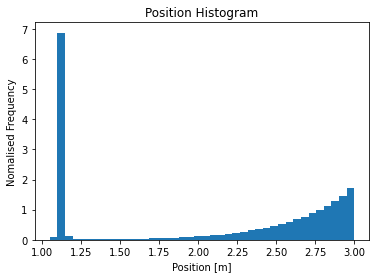

In [75]:
amplitudes_x_40, amplitudesbins_x_40, npatches_x_40 = plt.hist(positions, bins=40, density=True)
# Increase the bin size of the position distribution histogram

plt.title("Position Histogram")
plt.xlabel("Position [m]")
plt.ylabel("Nomalised Frequency")

In [76]:
range_avg = np.linspace(0.025+min(positions), max(positions), 40)
# Gives the average value of the position within each bin to help us fit a curve to the data

Text(0, 0.5, 'Nomalised Frequency')

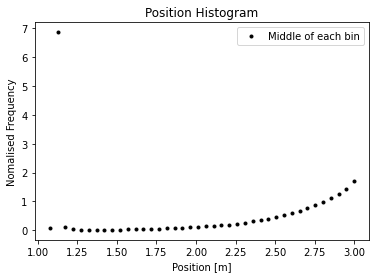

In [77]:
plt.plot(range_avg, amplitudes_x_40, 'o', color = 'black', markersize =3)

plt.legend(['Middle of each bin'])

plt.title("Position Histogram")
plt.xlabel("Position [m]")
plt.ylabel("Nomalised Frequency")

#### Using interpolate to Find h(r)

In [78]:
len(range_avg)

40

In [79]:
len(amplitudes_x)

100

In [80]:
f1 = interpolate.interp1d(range_avg, amplitudes_x_40,kind = 'nearest')
# Using the interpld1d function this interpolates between the middle of the bins and the amplitudes of the bins  
# to find the nearest fit 

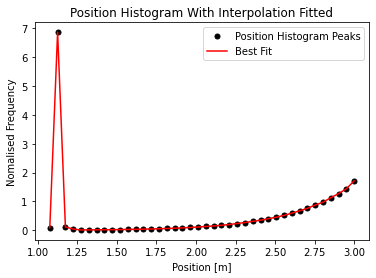

In [81]:
xnew = np.linspace(min(range_avg), max(range_avg),40)

plt.plot(range_avg, amplitudes_x_40, 'ko', xnew, f1(xnew), 'r-', markersize=5)
# Plots 

plt.legend(['Position Histogram Peaks', 'Best Fit'], loc = 'best')
plt.title("Position Histogram With Interpolation Fitted")
plt.xlabel("Position [m]")
plt.ylabel("Nomalised Frequency")

plt.show()

Now the bin size is increased to 300 in order to improve the fit of the interpolation.

Text(0.5, 0, 'Position [m]')

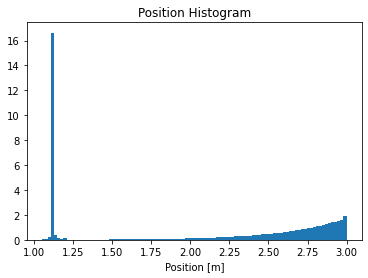

In [82]:
amplitudes_x, amplitudesbins_x, npatches_x = plt.hist(positions, bins=100, density=True)
# Increase the bin size of the position distribution histogram

plt.title("Position Histogram")
plt.xlabel("Position [m]")

In [83]:
range_avg = np.linspace(min(positions), max(positions), 100)
# Gives the average value of the position within each bin to help us fit a curve to the data

Text(0, 0.5, 'Nomalised Frequency')

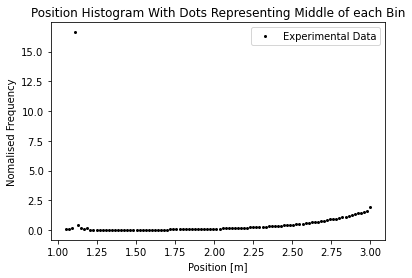

In [84]:
plt.plot(range_avg, amplitudes_x, 'o', color = 'black', markersize =2)

plt.legend(['Experimental Data'])

plt.title("Position Histogram With Dots Representing Middle of each Bin")
plt.xlabel("Position [m]")
plt.ylabel("Nomalised Frequency")

#### Using interpolate to Find $U_{PMF}$

In [85]:
f1 = interpolate.interp1d(range_avg, amplitudes_x,kind = 'nearest')

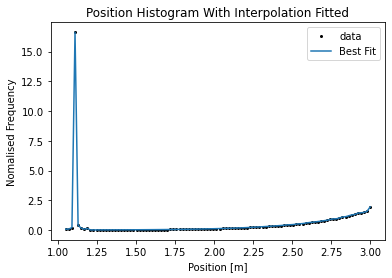

In [86]:
xnew = np.linspace(min(range_avg), max(range_avg),100)

plt.plot(range_avg, amplitudes_x, 'ko', xnew, f1(xnew), '-', markersize=2)

plt.legend(['data', 'Best Fit'], loc = 'best')
plt.title("Position Histogram With Interpolation Fitted")
plt.xlabel("Position [m]")
plt.ylabel("Nomalised Frequency")

plt.show()

In [87]:
k = 1.380649 * 10 **-23
T = T(v_rms)

In [88]:
U_PMF = -k*T*np.log(1+f1(xnew))
# Equation 6 using the interpolation function

Text(0, 0.5, 'Potential')

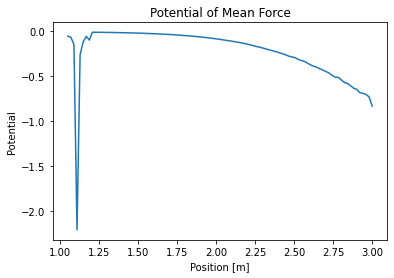

In [89]:
plt.plot(xnew, U_PMF)

plt.title("Potential of Mean Force")
plt.xlabel("Position [m]")
plt.ylabel("Potential")

#### Lennard-Jones Potential Plot

In [90]:
def Lennard_Jones_Pot(e, σ, r):
    return 4*e*((σ/r)**12-(σ/r)**6)


In [91]:
e = 1
σ = 1

Text(0.5, 1.0, 'Lennard-Jones Potential Function')

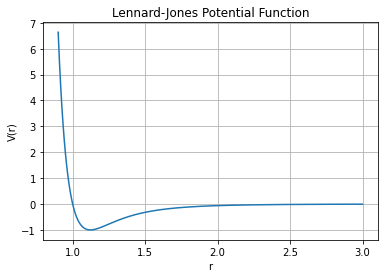

In [92]:
r = np.linspace(0.9,3,500)

plt.plot(r,Lennard_Jones_Pot(1, 1, r))

plt.xlabel("r")
plt.ylabel("V(r)")
plt.grid(True)
plt.title("Lennard-Jones Potential Function")

#### Compare with Lennard-Jones Potential

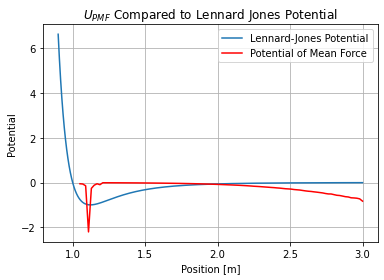

In [93]:
plt.plot(r,Lennard_Jones_Pot(1, 1, r))

plt.plot(xnew, U_PMF, color= 'r')

plt.legend(["Lennard-Jones Potential","Potential of Mean Force"])

plt.title("$U_{PMF}$ Compared to Lennard Jones Potential")
plt.xlabel("Position [m]")
plt.ylabel("Potential")
plt.grid(T)


## Undamped Motion

In [94]:
γ = 0
# Damping Coefficient is now equal to 0 

In [95]:
# Keep the same initial condition of starting at x=3 and carrying out 100,000 steps with a timestep of 0.001 seconds. 
positions = verlet_algorithm(3, 0.001, 100000)[0]
velocities = verlet_algorithm(3, 0.001, 100000)[1]
time = verlet_algorithm(3, 0.001, 100000)[2]

Text(0.5, 1.0, 'Particle Motion in Undamped System')

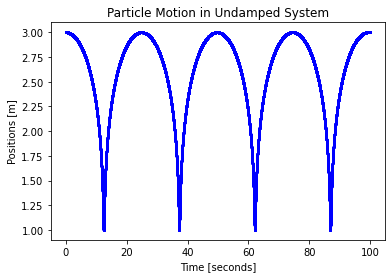

In [96]:
plt.plot(time ,positions,'bo', markersize='1')
plt.xlabel("Time [seconds]")
plt.ylabel("Positions [m]")

plt.title("Particle Motion in Undamped System")

Text(0.5, 1.0, 'Particle Velocity in Undamped System')

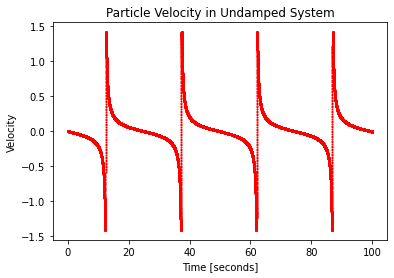

In [97]:
plt.plot(time,velocities,'ro', markersize='1')
plt.xlabel("Time [seconds]")
plt.ylabel("Velocity")
plt.title("Particle Velocity in Undamped System")

Text(0.5, 1.0, 'Position Velocity in Undamped System')

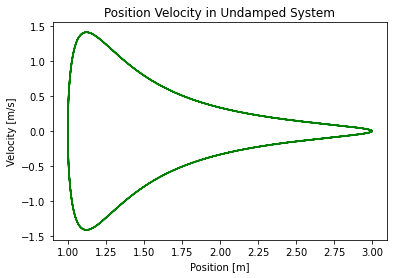

In [98]:
plt.plot(positions, velocities, color = 'g')
plt.xlabel("Position [m]")
plt.ylabel("Velocity [m/s]")
plt.title("Position Velocity in Undamped System")

In [117]:
def T(v):
    return (m*(v**2))/(1*k)

In [118]:
v_rms

0.877534987310892

In [119]:
T(v_rms)

5.577577312950122e+22

In [120]:
v_uncert = (0.001)**2

# Uncertainty on each value of the velocity due to the Global error on the velocity verlet algorithm with timsetep = 0.001

In [121]:
Vrms_Uncert = np.sqrt(v_uncert/len(velocities_increased_steps))

# Formula can be derived using propogation of errors showns in section 8.1 

In [122]:
Vrms_Uncert
# Uncertainty on the root mean square speed

1e-06

In [123]:
T_uncert = T(v_rms)*((2*Vrms_Uncert/v_rms)**2)

In [124]:
print(f"Uncertainty on Observed Temperature = {T_uncert:.3g} ")

Uncertainty on Observed Temperature = 2.9e+11 


In [127]:
print(f"The Uncertainty on the Average Velocity of the particle is = {np.sqrt(pcov[1,1]-0.0003):.2g} m/s to 2 significant figures")

The Uncertainty on the Average Velocity of the particle is = nan m/s to 2 significant figures


<ipython-input-127-c0223f5bb4c0>:1: RuntimeWarning: invalid value encountered in sqrt
  print(f"The Uncertainty on the Average Velocity of the particle is = {np.sqrt(pcov[1,1]-0.0003):.2g} m/s to 2 significant figures")


In [128]:
print("The Uncertainty on the Average Velocity of the particle is 0.000043 m/s to 2 significant figures")

The Uncertainty on the Average Velocity of the particle is 0.000043 m/s to 2 significant figures


In [129]:
a = 1.01427625724

In [130]:
a

1.01427625724

In [135]:
b = 7.452577312950122e+22

In [138]:
b

7.452577312950122e+22

In [141]:
print(f"Observed temperature is = {(b):.3g} K")

Observed temperature is = 7.45e+22 K
